In [0]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# DIVISION DEL SET DE ENTRENAMIENTO, VALIDACION Y TEST
[texto del enlace](https://)

In [3]:
data_pulsar.head() ##Visualización de los datos

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [0]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

# APLICACIÓN SOBRE LA DATA SIN BALANCEO
### Algoritmo: Redes Neuronales por defecto

Error MSE:  0.023138105567606652


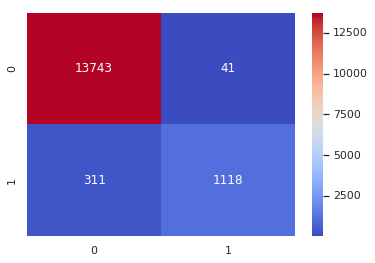

In [5]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()

NN_model.fit(X_trainval, y_trainval) 
y_trainval_predict= NN_model.predict(X_trainval)

from sklearn.metrics import mean_squared_error
NN_model_mse = mean_squared_error(y_trainval, y_trainval_predict)  
print("Error MSE: ",NN_model_mse)

from sklearn.metrics import confusion_matrix
NN_model_cm = confusion_matrix(y_trainval, y_trainval_predict)  

sns.heatmap(NN_model_cm,annot=True, fmt="d", cmap="coolwarm");

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_trainval, y_trainval_predict)
accuracy

0.9768618944323934

In [7]:
from sklearn.metrics import precision_score
precision = precision_score(y_trainval, y_trainval_predict)
precision

0.9646246764452114

In [8]:
from sklearn.metrics import recall_score
recall = recall_score(y_trainval, y_trainval_predict)
recall

0.7823652904128762

In [9]:
from sklearn.metrics import f1_score
f1score = f1_score(y_trainval, y_trainval_predict)
f1score

0.8639876352395673

# BALANCEO DE DATA
## Algoritmo: SMOTE

In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_pulsar)
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)
data_pulsar_scaled.describe()

#Partición de la data escalada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)

In [11]:
#Antes de aplicar SMOTE
y_train_sca.value_counts()

0.0    11020
1.0     1150
Name: is_pulsar, dtype: int64

In [12]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE()
X_sm_train, y_sm_train = smt.fit_resample(X_train_sca, y_train_sca)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [13]:
y_smote = pd.Series(y_sm_train)
y_smote.value_counts()


1.0    11020
0.0    11020
dtype: int64

## Entrenamiento por defecto

In [0]:
NN_model2 = MLPClassifier()
NN_model2.fit(X_sm_train, y_sm_train) 
y_sm_train_predict= NN_model2.predict(X_sm_train)
NN_model2_mse = mean_squared_error(y_sm_train, y_sm_train_predict)  
print("Error MSE: ",NN_model2_mse)


In [0]:
NN_model2_cm = confusion_matrix(y_sm_train, y_sm_train_predict)  
sns.heatmap(NN_model2_cm,annot=True, fmt="d", cmap="coolwarm");

In [0]:
accuracy = accuracy_score(y_sm_train, y_sm_train_predict) 
precision = precision_score(y_sm_train, y_sm_train_predict)
recall = recall_score(y_sm_train, y_sm_train_predict)
f1score = f1_score(y_sm_train, y_sm_train_predict)
print("accuracy",accuracy)
print("accuracy",precision)
print("accuracy",recall)
print("accuracy",accuracy)